In [3]:
import pandas as pd

us_accidents_df = pd.read_csv("D:\\UIC\\Fall 2023 Project\\US_Accidents\\US_Accidents_March23.csv")

In [4]:
us_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
us_accidents_df.count()

ID                       7728394
Source                   7728394
Severity                 7728394
Start_Time               7728394
End_Time                 7728394
Start_Lat                7728394
Start_Lng                7728394
End_Lat                  4325632
End_Lng                  4325632
Distance(mi)             7728394
Description              7728389
Street                   7717525
City                     7728141
County                   7728394
State                    7728394
Zipcode                  7726479
Country                  7728394
Timezone                 7720586
Airport_Code             7705759
Weather_Timestamp        7608166
Temperature(F)           7564541
Wind_Chill(F)            5729375
Humidity(%)              7554250
Pressure(in)             7587715
Visibility(mi)           7551296
Wind_Direction           7553188
Wind_Speed(mph)          7157161
Precipitation(in)        5524808
Weather_Condition        7554935
Amenity                  7728394
Bump      

## US Accidents Datamap(2016 - 2023)

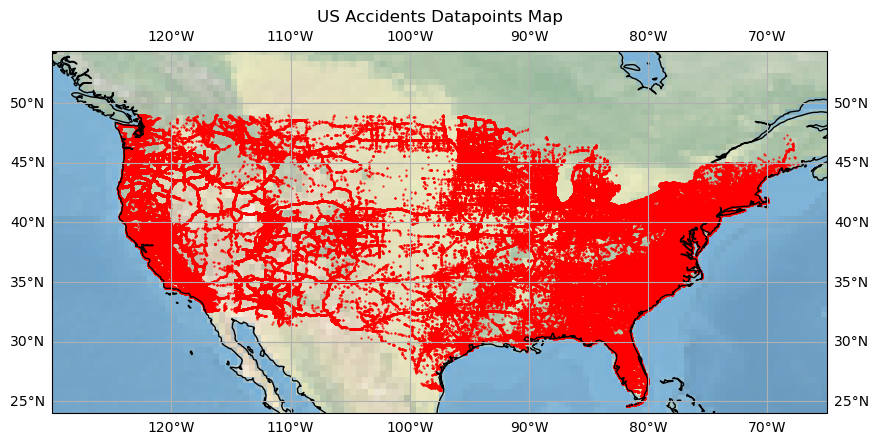

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Select a representative sample if the dataset is very large
sampled_data = us_accidents_df

# Create a Matplotlib figure with Cartopy
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -65, 24, 50])  # Set the extent to the continental US

# Add a map background
ax.stock_img()

# Plot points
plt.scatter(sampled_data['Start_Lng'], sampled_data['Start_Lat'], color='red', marker='.', s=1, transform=ccrs.Geodetic())

# Add gridlines, coastlines, and states for context (optional)
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

# Title and labels (optional)
plt.title('US Accidents Datapoints Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the figure
plt.savefig('us_accidents_map.png', dpi=300)

# Optionally display the plot
plt.show()


## US Accident-severity Datamap 

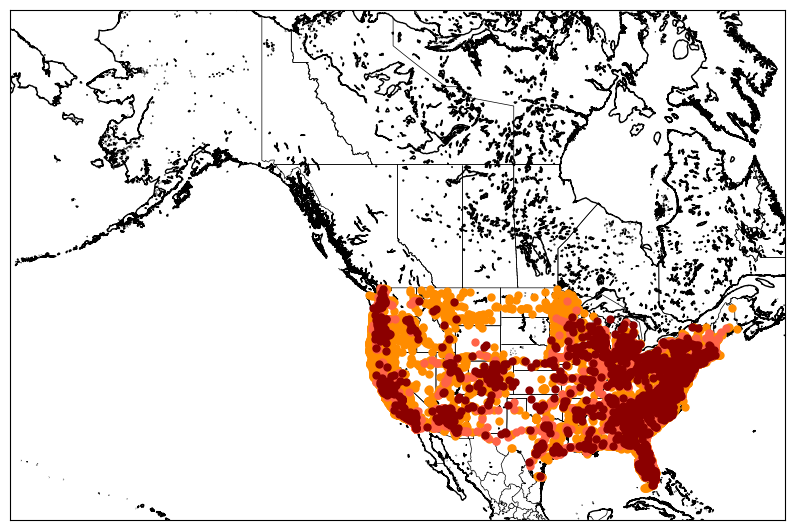

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

def severity_to_color(severity):
    """Maps severity level to a color."""
    if severity == 4:
        return 'darkred'
    elif severity == 3:
        return 'tomato'
    elif severity == 2:
        return 'darkorange'
    else:  # severity == 1
        return 'gold'

fig, ax = plt.subplots(figsize=(10, 15))
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
              resolution = 'h', area_thresh = 0.1,
              llcrnrlon=-180, llcrnrlat=20,
              urcrnrlon=-60, urcrnrlat=70)

sample_df_stratified = us_accidents_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(frac=0.01))

map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Plotting each point with the color based on its severity
for index, row in sample_df_stratified.iterrows():
    x, y = map(row['Start_Lng'], row['Start_Lat'])
    map.plot(x, y, 'o', color=severity_to_color(row['Severity']), markersize=5)

plt.show()


In [14]:
us_accidents_df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [17]:
import geopandas as gpd

# Load USA states dataset
usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming you have downloaded the shapefile to 'states_shapefile.shp'
usa_states = gpd.read_file('C:\\Users\\91812\\OneDrive\\Desktop\\MANan\\cb_2018_us_state_20m\\cb_2018_us_state_20m.shp')

print(usa_states.columns)


Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


C:\Users\91812\AppData\Local\Temp\ipykernel_17248\766612003.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## US Road Accident Severity Heatmap

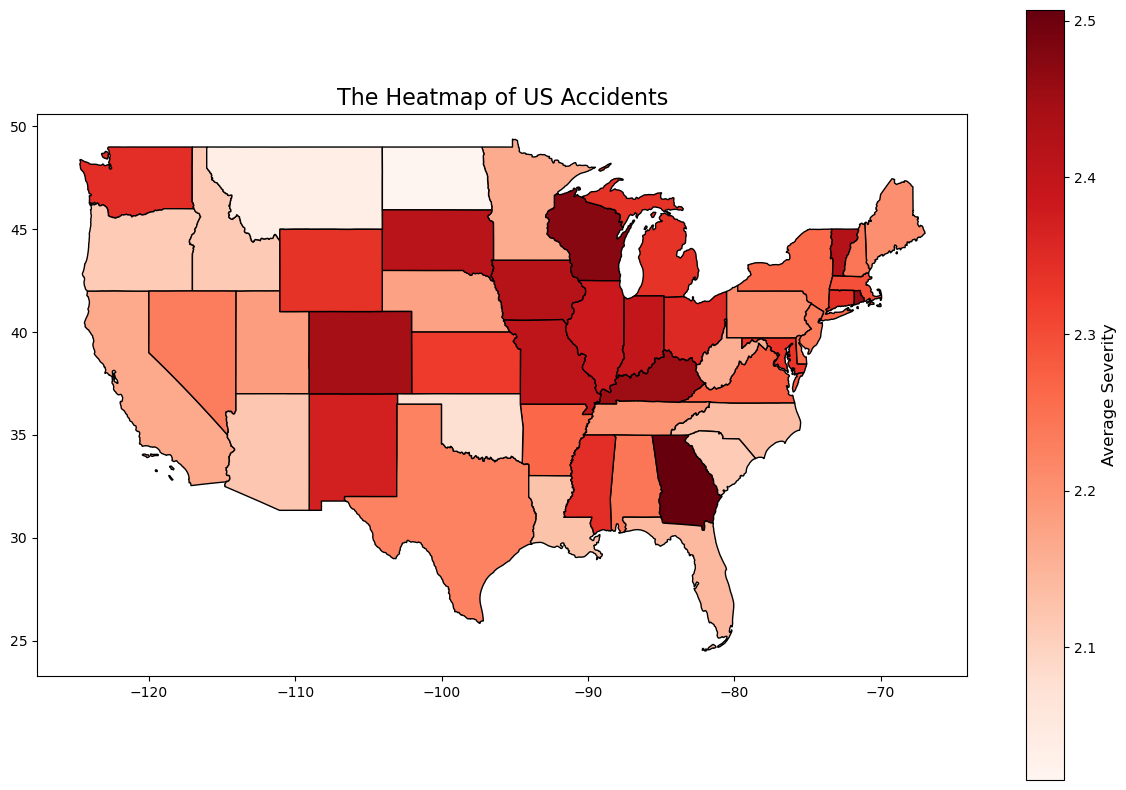

In [19]:
# Assuming avg_severity_per_state is your DataFrame with the average severity per state
avg_severity_per_state = us_accidents_df.groupby('State')['Severity'].mean().reset_index()

# Merge the data using 'STUSPS' as the state code column
merged_data = usa_states.set_index('STUSPS').join(avg_severity_per_state.set_index('State'))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Severity', ax=ax, legend=True, cmap='Reds', edgecolor='black')

# Set the title of the plot
ax.set_title("The Heatmap of US Accidents", fontsize=16)

# Customize the color bar
color_bar = ax.get_figure().get_axes()[1]
color_bar.set_ylabel('Average Severity', fontsize=12)

plt.show()



In [7]:
us_accidents_df = us_accidents_df.dropna(subset=['Severity', 'Sunrise_Sunset'])

## Accident Severity when occurred at Day/Night

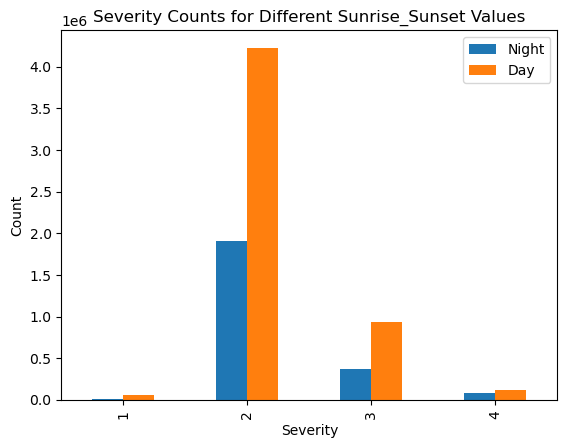

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Your existing code to read the dataframe

unique_severities = us_accidents_df['Severity'].unique()
unique_sunrise_sunset = us_accidents_df['Sunrise_Sunset'].unique()

counts = pd.DataFrame(index=unique_severities, columns=unique_sunrise_sunset)

for sun in unique_sunrise_sunset:
    counts[sun] = us_accidents_df[us_accidents_df['Sunrise_Sunset'] == sun]['Severity'].value_counts()

# Sort the index of the counts DataFrame in ascending order
counts.sort_index(inplace=True)

counts.plot(kind='bar')
plt.title('Severity Counts for Different Sunrise_Sunset Values')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


In [9]:
unique_weather_conditions = us_accidents_df['Weather_Condition'].unique()
unique_weather_conditions

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

## Top 5 Worse Weather Conditions causing Accidents, by Severity

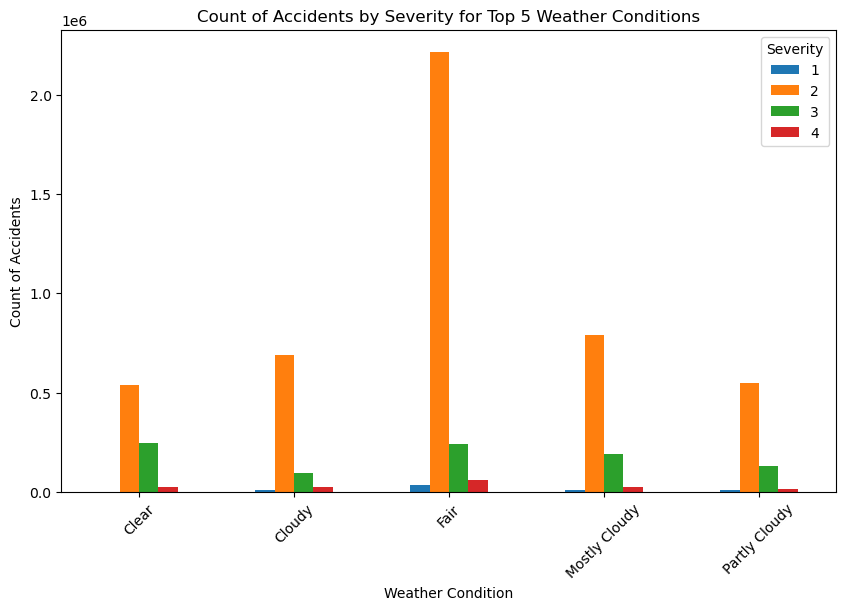

In [10]:
total_accidents_by_condition = us_accidents_df['Weather_Condition'].value_counts()

# Select top 5 weather conditions where most accidents occur
top_5_conditions = total_accidents_by_condition.head(5).index

# Filter the original dataframe for only the top 5 conditions
top_5_df = us_accidents_df[us_accidents_df['Weather_Condition'].isin(top_5_conditions)]

# Group data by Weather_Condition and Severity and count occurrences
grouped_data = top_5_df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)

# Plot
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Accidents by Severity for Top 5 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.show()

## Impact of the Traffic Due to the Road Accidents

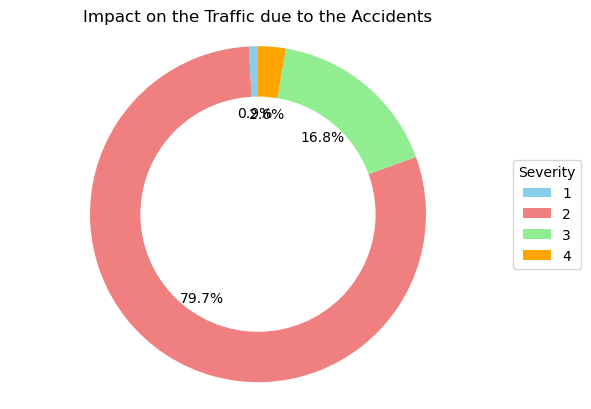

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Your existing code to read the dataframe

# Count the total accidents per severity value
severity_counts = us_accidents_df['Severity'].value_counts().sort_index()

# Plot the pie chart
plt.pie(severity_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add legend with labels outside the pie chart
plt.legend(severity_counts.index, title='Severity', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Impact on the Traffic due to the Accidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



## Interactive Accident-Severity Heatmap of USA

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import geopandas as gpd

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    us_accidents_df, geometry=gpd.points_from_xy(us_accidents_df.Start_Lng, us_accidents_df.Start_Lat))

# Create a base map
map = folium.Map(location=[39.50, -98.35], zoom_start=5)  # Center of the US

# Plot each accident as a point on the map (optional, can be skipped for just a heatmap)
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=3,  # or adjust based on severity
        color='red',  # or adjust based on severity
        fill=True,
        fill_color='red'  # or adjust based on severity
    ).add_to(map)

# Create a heatmap
heat_df = gdf[['Start_Lat', 'Start_Lng']]
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(map)

# Save or display the map
map.save('us_accidents_heatmap.html')  # saves the map to an HTML file
# map  # if running in a Jupyter notebook, this will display the map inline

In [ ]:
from folium import Map, CircleMarker, IFrame
from folium.plugins import HeatMap
from IPython.display import display
display(IFrame('C:\\Users\\91812\\OneDrive\\Desktop\\MANan\\us_accidents_heatmap.html', width=700, height=450))

In [ ]:
from IPython.display import HTML

# Load HTML content
with open('us_accidents_heatmap.html', 'r') as f:
    html_content = f.read()

# Display HTML
display(HTML(html_content))